## Testing if the wedge exhumation model works & makes sense:

The derivations in the [wedgex_derivation_equations.ipynb](wedgex_derivation_equations.ipynb) notebook resulted in a series of equations for the velocity and position of particless in a wedge that undergoes horizontal compression. 

*Note that these equations describe the velocity of particles in the wedge due to compression only. The velocities due to the transport of the wedge along the basal detachment still need to be added and included in the integration of particle positions.*

The equations for velocity are:

$$\dfrac{\partial x}{\partial t} = \dfrac{x}{L}v_c$$

where x is horizontal position, t is time, L is the width of the wedge, and v_C is the compressional velcotiy of the right hand side of the wedge

a simplified solution in which vy=0 at the bottom of the wedge
$$v_y = -\dfrac{2 (y- (\beta x))}{L} v_c$$

where y is the elevation of the particle.

which results in particle trajectories that are not parallel to the bottom of the wedge.

THe correct solution that does not use this assumption is:
$$v_y = \dfrac{v_c}{L} \left( (-2 - \dfrac{\beta}{\alpha - \beta}) y + (2 \beta + \dfrac{\alpha \beta}{\alpha - \beta}) x \right)$$

where alpha is the slope of the surface, and beta is the slope of the bottom of the wedge (m/m)

For the position of particles this yields:

For the x coordinate:

$$x = x_0 e^{v_c t /L}$$

where x0 is the position of the particle at t=0

a simplfied solution in which vy is assumed to be independent of x:

$$y = ((\alpha - \beta) x) e^{-2 v_c t /L} + \beta x$$

where y equals the elevation of the surface at t=0. This is implemented in the function ``y_position_over_time_simple`` and has been verified by comparison with the numerical solution.


and the full solution for y

$$y= \beta x_0 e^{v t} + \left(\alpha - \beta \right) x_0 e^{C_5 v t}$$

where

$$C_5 = (-2 - \dfrac{\beta}{\alpha - \beta})$$

and

$$v = v_c / L$$

This equation is implemented in the function ``y_position_over_time_correct_v2``

![Conceptual model for an orogenic wedge that moves up a sloping detachment and is compressed, with the surface staying at the same level](fig/Wedge_Model_Conceptual_smaller.png)

* L is the width of the wedge
* $v_d$ is the velcoity of the wedge itself
* $v_c$ is the compression velocity of the wedge, which is equal to the max. horizontal velocity at the right hand side of the wedge
* $\alpha$ is the slope of the land surface (m/m)
* $\beta$ is the slope of the bottom of the wedge (m/m)

## Import modules

In [25]:
%matplotlib inline

import string
import numpy as np
import matplotlib.pyplot as pl

year = 365.25 * 24 * 3600

## Some parameters

In [26]:
# compressional velocity
vc = -25e3 / 50e6

# transport velocity
vd = -50e3 / 50e6

# lenght of wedge
L = 200e3

# slope of topography (m/m)
alpha = 0.05

# slope of bottom of wedge (m/m)
beta = -0.1

# 
n_rows = 100

## Parameters for particle position over time

In [27]:
# x-coordinates of starting points:
x0s = np.arange(0, L+1e4, 1e4)

# timesteps (years)
t = np.linspace(0, -1e8, 10001)

print('particle starting points: ', x0s)

print('timesteps (Myr): ', t / 1e6)

particle starting points:  [     0.  10000.  20000.  30000.  40000.  50000.  60000.  70000.  80000.
  90000. 100000. 110000. 120000. 130000. 140000. 150000. 160000. 170000.
 180000. 190000. 200000.]
timesteps (Myr):  [ 0.000e+00 -1.000e-02 -2.000e-02 ... -9.998e+01 -9.999e+01 -1.000e+02]


## Set up functions to calculate particle velocities in wedge:

In [28]:
def velocity(xs, ys, beta, L, vc):
    
    vx = xs / L * vc
    vy = -2 * (ys - beta * xs) / (L) * vc
    
    return vx, vy


def velocity_better(xs, ys, alpha, beta, L, vc):
    
    gamma = alpha - beta
    
    vx = xs / L * vc
    
    vy = vc / L * ( (-2 - (beta / (alpha - beta)) ) * ys + (2 * beta + (alpha * beta)/(alpha - beta)) * xs)

    return vx, vy

## set up geometry of wedge

In [29]:
xcoords = np.linspace(0, L, 101)
y_top = xcoords * alpha
y_bottom = xcoords * beta

H = y_top.max() - y_bottom.min()

print('with the chosen slopes of land surface and wedge bottom/detachment the max height of '
      'the wedge is : ', H / 1e3, ' km')

ys = np.zeros((len(xcoords), n_rows))
xs = np.zeros_like(ys)
ybs = np.zeros_like(ys)

for i in range(len(xcoords)):
    ys[i, :] = np.linspace(y_bottom[i], y_top[i], n_rows)
    xs[i, :] = xcoords[i]
    ybs[i, :] = y_bottom[i]

with the chosen slopes of land surface and wedge bottom/detachment the max height of the wedge is :  30.0  km


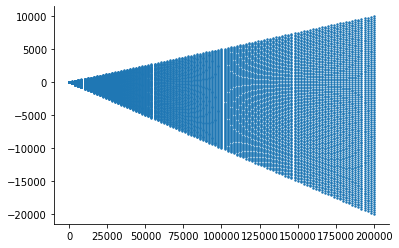

In [30]:
fig,ax = pl.subplots(1, 1)
ax.scatter(xs, ys, s=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Fig caption** *Shape of the wedge and numerical grid*

## Check the calculated velocities due to compression

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


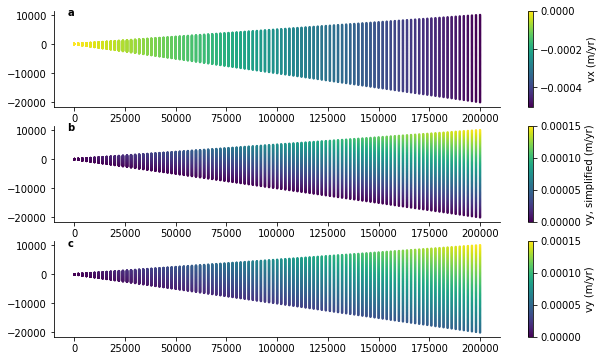

In [31]:
# calculate velocities:
vxc_simple, vyc_simple = velocity(xs, ys, beta, L, vc)

vxc, vyc = velocity_better(xs, ys, alpha, beta, L, vc)

#double check
vyt = 2 * H / L**2 * xs * vc

h = xs / L * H

#vytc = h / (ys - ybs) * vy

vy_check = (ys - ybs) / h * vyt

fig, axs = pl.subplots(3, 1, figsize=(10, 6))

cb1 = axs[0].scatter(xs, ys, c=vxc, s=2)
cb = fig.colorbar(cb1, ax=axs[0])
cb.set_label('vx (m/yr)')

cb3 = axs[1].scatter(xs, ys, c=vyc_simple, s=2)
cb = fig.colorbar(cb3, ax=axs[1])
cb.set_label('vy, simplified (m/yr)')

cb2 = axs[2].scatter(xs, ys, c=vyc, s=2)
cb = fig.colorbar(cb2, ax=axs[2])
cb.set_label('vy (m/yr)')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')

**Fig. caption** *Calculated horizontal and vertical velocties in a wegde that undergoes horizontal compression. a) horizontal velcotiy, b) simplified vertical velocity, where the vertical velcotity is assumed to be zero at the bottom of the wedge, and c) the correct solution for vertical velocity*

## Check if calculated velocity fullfills criteria

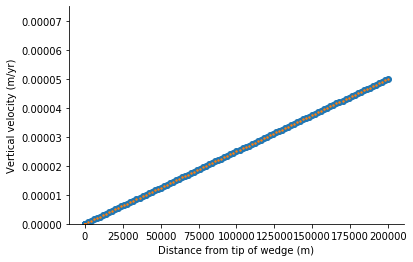

In [32]:
ind_bottom = ys == ybs

fig, ax = pl.subplots(1, 1)

ax.scatter(xs[ind_bottom], vxc[ind_bottom] * beta)
ax.scatter(xs[ind_bottom], vyc[ind_bottom], s=2)

ax.set_ylim(0, vyc[ind_bottom].max() * 1.5)

ax.set_xlabel('Distance from tip of wedge (m)')
ax.set_ylabel('Vertical velocity (m/yr)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


**Fig caption** *Double check to see if the calculated vertical velocity at the base (small dots) is equal to the expected value (big dots)*

## Make a figure of particle velcoity in the wedge

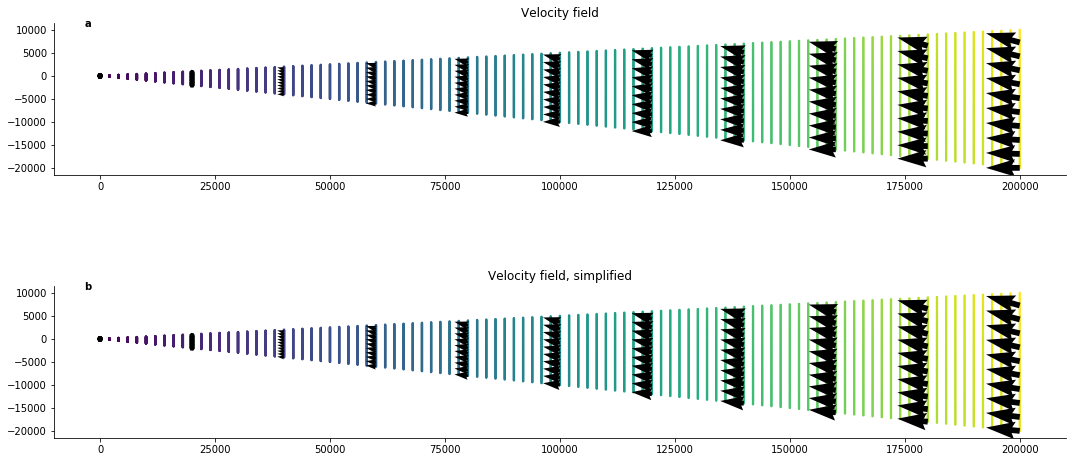

In [33]:
arrow_int = 10

v = np.sqrt(vxc**2 + vyc**2)

fig, axs = pl.subplots(2, 1, figsize=(15, 8))

for ax, vxi, vyi in zip(axs, [vxc_simple, vxc], [vyc_simple, vyc]):

    ax.scatter(xs, ys, c=v, s=2)
    ax.quiver(xs[::arrow_int, ::arrow_int], 
              ys[::arrow_int, ::arrow_int], 
              vxi[::arrow_int, ::arrow_int], 
              vyi[::arrow_int, ::arrow_int], scale=1.5e-2)

    ax.set_aspect('equal')

axs[0].set_title('Velocity field')
axs[1].set_title('Velocity field, simplified')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
fig.tight_layout()

**Fig caption** *Particle velocity vectors in the wedge for (a) the simplified solution with a zero vertical velocity at the bottom of the wedge and (b) the correct solution*

## Function for particle x position over time

Following this equation:

$$x = x_0 e^{v_c t /L}$$

In [34]:
def x_over_time(x0, vc, t, L):
    '''
    Horizontal position (x) over time (t)
    '''
    
    xh = x0 * np.exp((vc*t/L))
    
    return xh


## Test integration of x

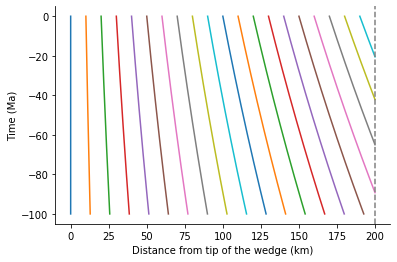

In [35]:
xpc = np.array([x_over_time(x0, vc, t, L) for x0 in x0s])

# elimnate values outside the wedge
xpc[xpc>L] = np.nan

fig, ax = pl.subplots(1, 1)
for xi in xpc:
    ax.plot(xi / 1e3, t / 1e6)

# show edge of the wedge
ax.axvline(x=L/1e3, color='gray', ls='--')

ax.set_xlabel('Distance from tip of the wedge (km)')
ax.set_ylabel('Time (Ma)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Fig caption** *Calculated horizontal position of particles over time in a stationary wedge undergoing compression*

## Set up functions for particle elevation over time:

Simplified solution in which vy is assumed to be independent of x:

$$y = ((\alpha - \beta) x) e^{-2 v_c t /L} + \beta x$$

The solution, as derived by Leo is:

$$y=C_2 x_0 \dfrac{e^{v_c t /L}}{v_c/L - C_1} + \left( y_0 - \dfrac{C_2 x_0}{v_c /L - C_1} \right) e ^{C_1 t}$$

where 

$$C_1 =  \dfrac{v_c}{L} \left( (-2 - \dfrac{\beta}{\alpha - \beta}) \right)$$

and
$$C_2 = \dfrac{v_c}{L} (2 \beta + \dfrac{\alpha \beta}{\alpha - \beta})$$


Which was derived by integrating the vertical velocity function (which is correct, see tests above):

$$v_y = \dfrac{v_c}{L} \left( (-2 - \dfrac{\beta}{\alpha - \beta}) y + (2 \beta + \dfrac{\alpha \beta}{\alpha - \beta}) x \right)$$

The full solution can be rewritten to:

$$y= \beta x_0 e^{v t} + \left( y_0 - \beta x_0 \right) e^{C_5 v t}$$

In [36]:
def y_position_over_time_simple(t, x, alpha, beta, vc, L):
    
    """
    This is the version in which x is assumed constant, i.e. vy is independent of x
    """
    
    
    yloc = (alpha - beta) * x * np.exp(-2 * vc * t / L) + beta * x
    
    return yloc


def y_position_over_time(t, x0, alpha, beta, vc, L):
    
    """
    This is the version with a simplified vertical velocity of 0 (vy=0) at the base of the wedge:
    """
    
    yloc = 2 * beta * x0 * np.exp(-vc * t / L) + (alpha * x0 - 2 * beta * x0) * np.exp(-2 * vc * t /L)
    #yloc = - beta * (3 * alpha - 2 * beta) / (2 * alpha - beta) * x0 * np.exp(vc / L * t)
    
    return yloc


def y_position_over_time_correct(t, x0, alpha, beta, vc, L):
    
    """
    This is the full solution by Leo:
    """
    
    y0 = alpha * x0
    
    C1 = vc / L * (-2 - (beta / (alpha - beta)))
    
    C2 = vc / L * (2 * beta + (alpha * beta / (alpha-beta)))
    
    yloc = C2 * x0 *np.exp(vc * t / L) / (vc/L - C1) + (y0 -(C2* x0)/(vc/L -C1))*np.exp(C1 * t)

    return yloc
    
    
def y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L):
    
    """
    This is the full solution by Leo, but then rewritten and simplified
    """
    
    y0 = alpha * x0
    
    v = vc/L
    
    C5 = -2 - (beta / (alpha - beta))
    
    
    yloc = beta * x0 *np.exp(v * t) + (y0 -(beta * x0))*np.exp(C5 * v * t)

    #$$y= \beta x_0 e^{v t} + \left( y_0 - \beta x_0 \right) e^{C_5 v t}$$
    
    return yloc
    


## Testing the integration of y over time:

In [37]:
ypc_simple = np.array([y_position_over_time_simple(t, x0, alpha, beta, vc, L) for x0 in x0s])

ypc = np.array([y_position_over_time_correct(t, x0, alpha, beta, vc, L) for x0 in x0s])

ypc2 = np.array([y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L) for x0 in x0s])


## Derive particle trajectories using numerical backstepping

In [38]:
def numerical_particle_trajectory(t, x0, alpha, beta, L, vc, simple_method=False):
    
    xp = [x0]
    yp = [x0 * alpha]
    
    if simple_method is True:
        vx, vy = velocity(xp[-1], yp[-1], beta, L, vc)
    else:
        vx, vy = velocity_better(xp[-1], yp[-1], alpha, beta, L, vc)
        
    dt = np.diff(t)
    
    for dti in dt:
        xp.append(xp[-1] + vx * dti)
        yp.append(yp[-1] + vy * dti)
        
        if simple_method is True:
            vx, vy = velocity(xp[-1], yp[-1], beta, L, vc)
        else:
            vx, vy = velocity_better(xp[-1], yp[-1], alpha, beta, L, vc)
            
    return np.array(xp), np.array(yp)

In [39]:
xypc_num = np.array([numerical_particle_trajectory(t, x0, alpha, beta, L, vc) for x0 in x0s])

xypc_num_simple = np.array([numerical_particle_trajectory(t, x0, alpha, beta, L, vc, simple_method=True) 
                           for x0 in x0s])

xpc_num, ypc_num = xypc_num[:, 0], xypc_num[:, 1]

xpc_num_simple, ypc_num_simple = xypc_num_simple[:, 0], xypc_num_simple[:, 1]

## Plot trajectories over time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


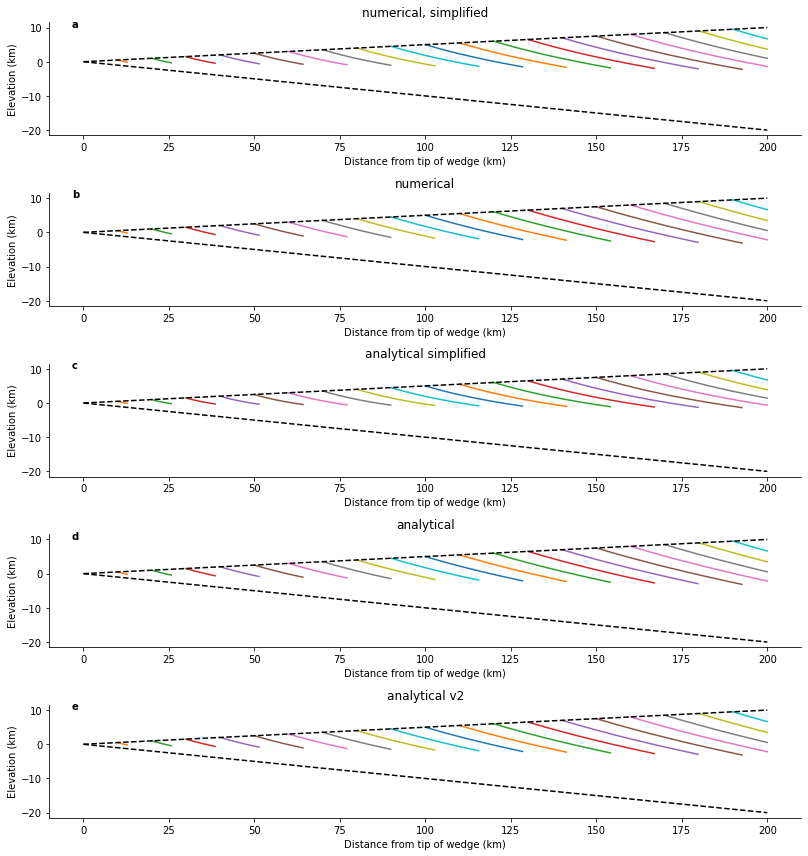

In [40]:
fig, axs = pl.subplots(5, 1, figsize=(15, 12))

labels = ['numerical, simplified', 'numerical', 
          'analytical simplified', 'analytical', 'analytical v2']

for ax, xpi, ypi, label in zip(axs, [xpc_num_simple, xpc_num, xpc, xpc, xpc], 
                               [ypc_num_simple, ypc_num, ypc_simple, ypc, ypc2], labels):
    
    ind = xpi > L
    xpi[ind] = np.nan
    ypi[ind] = np.nan
    
    for xl, yl in zip(xpi, ypi):
        leg_traj, = ax.plot(xl / 1e3, yl / 1e3)

    nt = xpi.shape[1]

    for nti in range(0, nt, 10):
        #leg_ts =  ax.scatter(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, s=20, color='black')
        #leg_tsl, =  ax.plot(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, color='gray', ls=':')
        pass
    
    leg_bnd, = ax.plot(xcoords / 1e3, y_top / 1e3, color='black', ls='--', lw=1.5)
    ax.plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='--', lw=1.5)
    
    ax.set_title(label)

for i, ax in enumerate(axs):
    ax.set_xlabel('Distance from tip of wedge (km)')
    ax.set_ylabel('Elevation (km)')

    ax.set_aspect('equal')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
#fig.legend([leg_traj, leg_tsl, leg_bnd], 
#          ['particle trajectories', 'Timesteps', 'Isochron', 'Wedge boundaries'], 
#          loc='lower center', ncol=2)

fig.tight_layout()

**Fig caption** *From top to bottom: a) numerical solution for particle trajectories in a wedge that undergoes horizontal compression. This is the simplified solution where the veritcal velocity at the bottom of the wedge is assumed zero (and not parallel to the bottom of the wedge) b) Numerical solution, but with correct term for the vertical velocity c) analytical solution, simplified with the assumption that vertical velocity is inbdependent of horizontal position (x) d) full analytical solution without any additional simplifications, (e) the same analytical solution but reformulated*

## Numerical solution with transport velocity

The previous figures only inlcuded the particle velcotiy due to compression. In the following blocks we will try to add in the velocity due to the transport of the wedge.




## Set up a function for calculating velocity

In [41]:
def velocity_compression_and_transport(xs, ys, alpha, beta, L, vc, vd, return_all=False):
    
    gamma = alpha - beta
    
    vxc = xs / L * vc
    
    vyc = vc / L * ( (-2 - (beta / (alpha - beta)) ) * ys + (2 * beta + (alpha * beta)/(alpha - beta)) * xs)
    
    vxd = np.ones_like(xs) * vd
    
    vyd = np.ones_like(xs) * beta * vd
    
    vx = vxc + vxd
    
    vy = vyc + vyd
    
    if return_all is True:
        return vx, vy, vxc, vyc, vxd, vyd
    else:
        return vx, vy

## Calculate velocity field

In [42]:
vx, vy, vxc, vyc, vxd, vyd = velocity_compression_and_transport(xs, ys, alpha, beta, L, vc, vd, 
                                                                return_all=True)

## Make a figure of particle velocity in the wedge

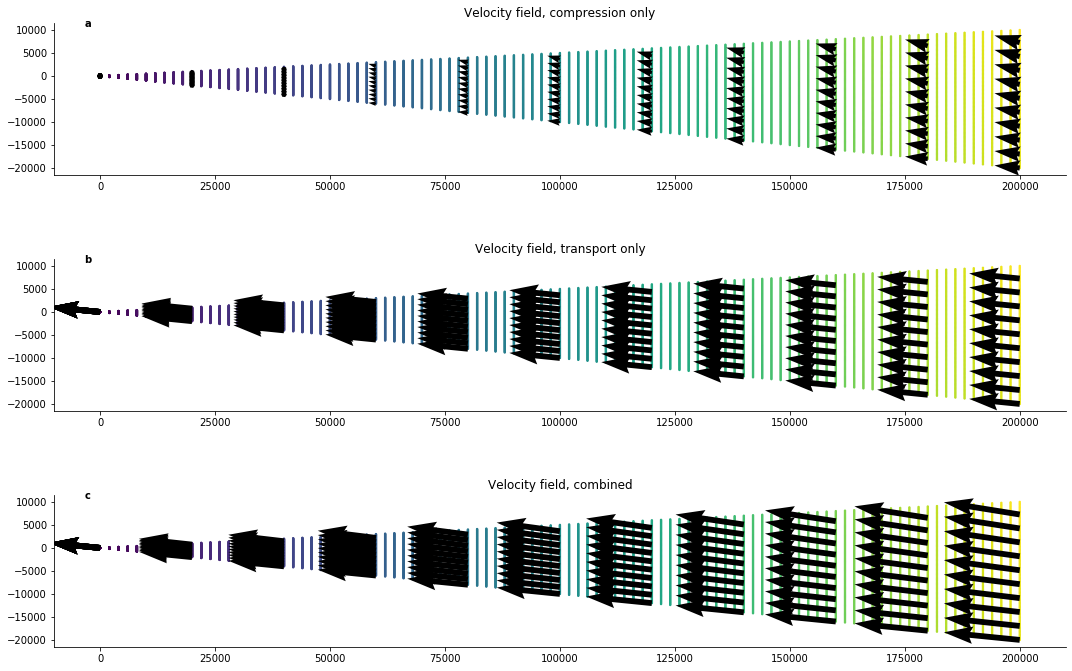

In [43]:
arrow_int = 10

v = np.sqrt(vxc**2 + vyc**2)

scale = 2.0e-2


fig, axs = pl.subplots(3, 1, figsize=(15, 10))

for ax, vxi, vyi in zip(axs, [vxc, vxd, vx], [vyc, vyd, vy]):

    ax.scatter(xs, ys, c=v, s=2)
    ax.quiver(xs[::arrow_int, ::arrow_int], 
              ys[::arrow_int, ::arrow_int], 
              vxi[::arrow_int, ::arrow_int], 
              vyi[::arrow_int, ::arrow_int], scale=scale)

    ax.set_aspect('equal')

axs[0].set_title('Velocity field, compression only')
axs[1].set_title('Velocity field, transport only')
axs[2].set_title('Velocity field, combined')


for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
fig.tight_layout()

## Calculate particle trajectories

Next we will use a numerical backstepping procedure using the velocity field to calculate the particle positions over time

In [44]:
def numerical_particle_trajectory_full(t, x0, alpha, beta, L, vc, vd):
    
    xp = [x0]
    yp = [x0 * alpha]
    
    vx, vy = velocity_compression_and_transport(xp[-1], yp[-1], alpha, beta, L, vc, vd)
        
    dt = np.diff(t)
    
    for dti in dt:
        xp.append(xp[-1] + vx * dti)
        yp.append(yp[-1] + vy * dti)
        
        vx, vy = velocity_compression_and_transport(xp[-1], yp[-1], alpha, beta, L, vc, vd)
            
    return np.array(xp), np.array(yp)

In [45]:
xyp_num = np.array([numerical_particle_trajectory_full(t, x0, alpha, beta, L, vc, vd) for x0 in x0s])

xp_num, yp_num = xyp_num[:, 0], xyp_num[:, 1]

## Simplified analytical solution

Next we will evaluate a simplified analytical solution for particle positions over time. This is an exact solution for x. The solution for y calculates depth over time for compression and transport separately and then adds them together.


In [46]:
def analytical_solution_combined_simplified(t, x0, alpha, beta, L, vc, vd):
    
    v = vc / L
    
    x = (x0 + vd / v) * np.exp(v * t) - vd/v
    #$$x = \left( x_0 - \dfrac{v_d}{v} \right) e^{v t} - \dfrac{v_d}{v}$$
    
    C5 = -2 - (beta / (alpha - beta))
    #$$C_5 = (-2 - \dfrac{\beta}{\alpha - \beta})$$
    
    dc = alpha * x0 - beta * x0 * np.exp(v*t) - (alpha - beta) * x0 * np.exp(C5 * v * t)
    
    #$$d_c =  \alpha x_0 - \beta x_0 e^{v t} - \left(\alpha - \beta \right) x_0 e^{C_5 v t}$$

    dd = -beta * vd * t
    
    d = dc + dd
    
    y = alpha * x0 - d
    
    return x, y

In [47]:
# np.array([y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L) for x0 in x0s])

xyp = np.array([analytical_solution_combined_simplified(t, x0, alpha, beta, L, vc, vd) for x0 in x0s])

xp, yp = xyp[:, 0], xyp[:, 1]

## Plot numerical and analytically derived particle trajectories over time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


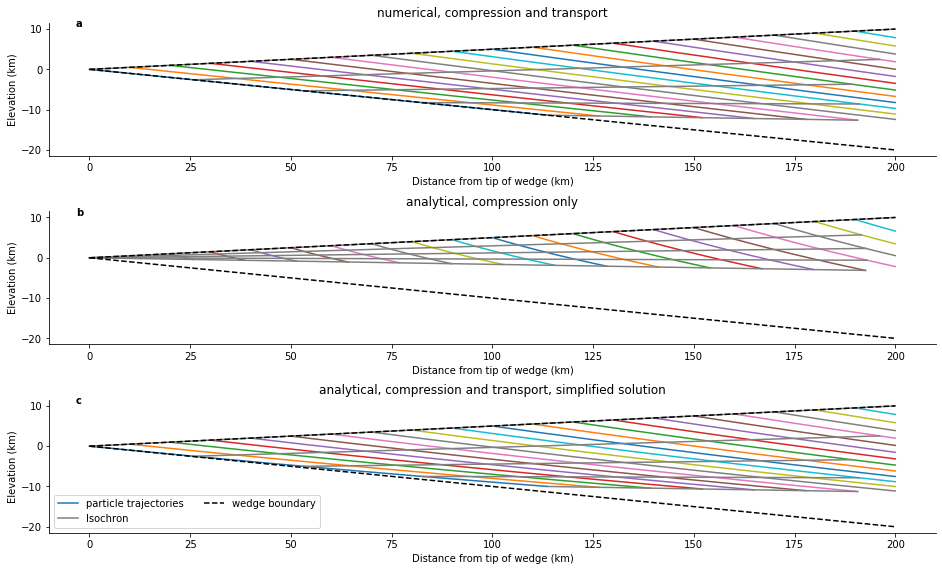

In [48]:
fig, axs = pl.subplots(3, 1, figsize=(15, 8))

labels = ['numerical, compression and transport', 
          'analytical, compression only', 
          'analytical, compression and transport, simplified solution']

for ax, xpi, ypi, label in zip(axs, 
                               [xp_num, xpc, xp], 
                               [yp_num, ypc, yp], 
                               labels):
    
    ind = xpi > L
    xpi[ind] = np.nan
    ypi[ind] = np.nan
    
    for xl, yl in zip(xpi, ypi):
        leg_traj, = ax.plot(xl / 1e3, yl / 1e3)

    nt = xpi.shape[1]
    
    isochron_ts = np.linspace(0, nt - 1, 5).astype(int)
    
    for nti in isochron_ts:
        #leg_ts =  ax.scatter(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, s=20, color='black')
        leg_tsl, =  ax.plot(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, color='gray', ls='-')
        pass
    
    leg_bnd, = ax.plot(xcoords / 1e3, y_top / 1e3, color='black', ls='--', lw=1.5)
    ax.plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='--', lw=1.5)
    
    ax.set_title(label)

for i, ax in enumerate(axs):
    ax.set_xlabel('Distance from tip of wedge (km)')
    ax.set_ylabel('Elevation (km)')

    ax.set_aspect('equal')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
axs[-1].legend([leg_traj, leg_tsl, leg_bnd], 
          ['particle trajectories', 'Isochron', 'wedge boundary'], 
          loc='lower left', ncol=2)

fig.tight_layout()

**Fig caption** *(a) numerical solution for particle trajectories in a wedge that is transported sideways and upward along a basal detachment, and that undergoes horizontal compression. (b) analytical solution for compression only, no transport, (c) simplified analytical solution, with correct equation for x and adding depth due to compression and depth due to transport, (d) full solution (? todo....)*